<h3>Previsão dos Sobreviventes do Titanic com Aprendizado Supervisionado</h3>
<p>Descrição das colunas:</p>
<ul>
    <li><b>PassengerId:</b> identificador sequencial.</li>
    <li><b>Survived:</b> 0 = não sobreviveu, 1 = sobreviveu.</li>
    <li><b>Pclass:</b> código da classe.</li>
    <li><b>Name:</b> nome do passageiro.</li>
    <li><b>Sex:</b> sexo do passageiro.</li>
    <li><b>Age:</b> idade do passageiro em anos.</li>
    <li><b>SibSp:</b> número de irmãos/cônjuges a bordo.</li>
    <li><b>Parch:</b> número de pais/filhos a bordo.</li>
    <li><b>Ticket:</b> código do bilhete.</li>
    <li><b>Fare:</b> tarifa do passageiro em dólares.</li>
    <li><b>Cabin:</b> código da cabine de hospedagem.</li>
    <li><b>Embarked:</b> código do porto onde o passageiro embarcou.</li>
</ul>

<h4>Exploração dos Dados</h4>

<p align="justify">O método visualization_csv_inline recebe o endereço do arquivo a ser visualizado em url_path, as colunas mostradas na visualização em titles e o limite de linhas em limit.</p>

In [23]:
url_train, url_test, url_label = 'titanic/train.csv', 'titanic/test.csv', 'titanic/gender_submission.csv' # endereços dos arquivos utilizados
from Neuraline.Utilities.data import DataTable # importação da classe de manipulação de dados tabulares
data_table = DataTable() # instanciação do objeto de manipulação de dados tabulares
titles = ['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'] # lista com os nomes das colunas que serão exibidas
data_table.visualization_csv_inline(url_path=url_train, titles=titles, limit=5) # visualiza a tabela com as colunas definidas na linha de cima

╒══════════╤═════════════════════════════════════════════════════╤════════╤═══════╤═════════╤═════════╤══════════════════╤═══════════╤═════════╤════════════╤════════════╕
│   Pclass │ Name                                                │ Sex    │   Age │   SibSp │   Parch │ Ticket           │      Fare │ Cabin   │ Embarked   │   Survived │
╞══════════╪═════════════════════════════════════════════════════╪════════╪═══════╪═════════╪═════════╪══════════════════╪═══════════╪═════════╪════════════╪════════════╡
│        3 │ Braund. Mr. Owen Harris                             │ male   │    22 │       1 │       0 │ A/5 21171        │    7.25   │         │ S          │          0 │
├──────────┼─────────────────────────────────────────────────────┼────────┼───────┼─────────┼─────────┼──────────────────┼───────────┼─────────┼────────────┼────────────┤
│        1 │ Cumings. Mrs. John Bradley (Florence Briggs Thayer) │ female │    38 │       1 │       0 │ PC 17599         │   71.2833 │ C85     │ 

True

<h4>Treinamento do Modelo</h4>
<p align="justify">O método fitCSV recebe o endereço do arquivo de trainamento em url_path os nomes da colunas de entrada em list_inputs e os nomes das colunas de saída em list_outputs.</p>

In [24]:
list_inputs, list_outputs = ['Pclass', 'Sex', 'Age', 'Cabin', 'SibSp', 'Parch'], ['Survived'] # listas com as colunas que formarão os dados de entrada e saída do treinamento
from Neuraline.ArtificialIntelligence.MachineLearning.SupervisedLearning.k_nearest_neighbors import KNearestNeighbors # importação do algoritmo que será utilizado
k_nearest_neighbors = KNearestNeighbors() # instanciação do objeto do algoritmo
k_nearest_neighbors.fitCSV(url_path=url_train, list_inputs=list_inputs, list_outputs=list_outputs) # treinamento do modelo através do arquivo CSV de treino

True

<h4>Teste do Modelo</h4>
<p align="justify">O método test recebe no primeiro parâmetro as entradas que serão testadas e no segundo parâmetro as saídas esperadas para essas entradas.</p>

In [29]:
test_inputs, test_outputs = data_table.read_csv(url_path=url_test, titles=list_inputs), data_table.read_csv(url_path=url_label, titles=list_outputs) # lista do teste
test_result = k_nearest_neighbors.test(inputs=test_inputs, outputs=test_outputs) # execução do teste de assertividade

In [30]:
test_result # exibição do resultado probabilístico do teste

{'assertiveness': 0.8110047846889952, 'error': 0.18899521531100483}

<h4>Visualização Gráfica do Teste</h4>

<p align="justify">O método plotBAR recebe a lista com os valores do eixo X, a lista com os valores do eixo Y a descrição dos eixos X e Y, o título descritivo do gráfico e no parâmetro bar_values recebe um booleano que indicará se os valores do gráfico deverão ou não serem exibidos nas suas respectivas barras.</p>

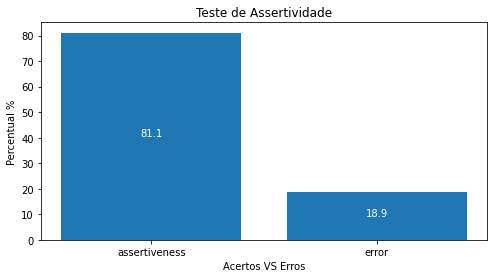

In [31]:
from Neuraline.Utilities.chart import Chart # importação da classe para manipulação de gráficos
chart = Chart() # instanciação do objeto de manipulação de gráficos
x, y = list(test_result.keys()), [y*100 for y in list(test_result.values())] # valores dos eixos X e Y do gráfico
chart.plotBAR(x=x, y=y, x_label='Acertos VS Erros', y_label='Percentual %', title='Teste de Assertividade', bar_values=True) # exibição do gráfico de probabilidades